In [9]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json
import h5py
import matplotlib.pyplot as plt

print ("[started]")

class_types_hand = ['click','fist','forward','maxmize','minimize','previous','spacebar','stop','volume_down','volumeup']

# Initialising the CNN Classifier

cnn_classifier_hand = Sequential()

# Adding 1st Convolution Layer
cnn_classifier_hand.add(Conv2D(100, (5, 5), input_shape = (100, 100, 3), activation = 'relu'))

# Adding Pooling
cnn_classifier_hand.add(MaxPooling2D(pool_size = (2, 2)))

# Adding 2nd convolutional layer
cnn_classifier_hand.add(Conv2D(100, (3, 3), activation = 'relu'))

cnn_classifier_hand.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the data
cnn_classifier_hand.add(Flatten())

# Adding Dense layers 
cnn_classifier_hand.add(Dense(units = 128, activation = 'relu'))

# Adding softmax activator ( 10 indicates we have 10 different hand positons)

cnn_classifier_hand.add(Dense(units = 10, activation = 'softmax'))

# Compiling the CNN
cnn_classifier_hand.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the CNN to the images

trian_data = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

tarin_set = trian_data.flow_from_directory(r'C:\Users\Gagan\Desktop\Dataset_prep\salt_pepper\processed',
                                                 target_size = (100, 100),
                                                 batch_size = 100,
                                                 class_mode = 'categorical',classes=class_types_hand)


classify = cnn_classifier_hand.fit(tarin_set,
                         steps_per_epoch = 10,
                         epochs = 10)


[started]
Found 1186 images belonging to 10 classes.
Epoch 1/10
10/10 [==============================] - 28s 3s/step - loss: 3.3635 - accuracy: 0.1349
Epoch 2/10
10/10 [==============================] - 26s 3s/step - loss: 2.1759 - accuracy: 0.2039
Epoch 3/10
10/10 [==============================] - 27s 3s/step - loss: 1.8740 - accuracy: 0.3830
Epoch 4/10
10/10 [==============================] - 28s 3s/step - loss: 1.5453 - accuracy: 0.4990
Epoch 5/10
10/10 [==============================] - 28s 3s/step - loss: 1.3076 - accuracy: 0.6080
Epoch 6/10
10/10 [==============================] - 26s 3s/step - loss: 1.0688 - accuracy: 0.6643
Epoch 7/10
10/10 [==============================] - 26s 3s/step - loss: 0.9402 - accuracy: 0.7120
Epoch 8/10
10/10 [==============================] - 26s 3s/step - loss: 0.7583 - accuracy: 0.7769
Epoch 9/10
10/10 [==============================] - 28s 3s/step - loss: 0.6971 - accuracy: 0.7860
Epoch 10/10
10/10 [==============================] - 27s 3s/step 

In [12]:
# Creating the Json file

json_modal = cnn_classifier_hand.to_json()
with open("salt_Pepper.json", "w") as json_file:
    json_file.write(json_modal)

#Saving Weights

cnn_classifier_hand.save_weights("salt_Pepper.h5")

print("Pickle file saved")

Pickle file saved


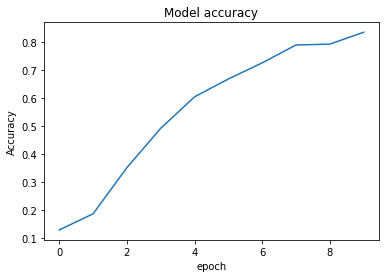

In [13]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()